# Geographical Ratings and Ratings Across Values and Benefits
-------------------

> <i>Description: In this notebook, We do the brief analysis of the ratings data in order to prepare the graphs for the geographical ratings and ratings across values and benefits. 

We used the ratings_preprocessed data, modified it by adding a new column, checked the data and set the minimum value of the ratings for the graph to 100, then created a map with the Geographical Ratings. 

Next, we created a graph with Average Scores by Year and added there the industry average score of 3.3. 

Input Files: 
1) ratings_preprocessed.csv

Output:
1) world_map_scores.html
2) Average Scores by Year

In [3]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns

### Data preparation

In [2]:
df = pd.read_csv('ratings_preprocessed.csv')

score_columns = [
    'Compensation & Benefits Score', 
    'communication_score',
    'Atmosphere Score',
    'image_score',
    'Work Life Balance Score',
    'Career Score', 
    'environment_score',
    'teamwork_score',
    'oldColleagues_score',
    'Leadership Score',
    'workConditions_score',
    'Diversity & Equality Score',
    'tasks_score'
]

df['Average Score'] = df[score_columns].mean(axis=1)

### Geographical data

In [4]:
import pandas as pd
import plotly.express as px

# Step 1: Replace 'England' with 'United Kingdom'
df['country'] = df['country'].replace({'England': 'United Kingdom'})

# Step 2: Filter relevant score columns (columns that contain 'score' in their names)
score_columns = [col for col in df.columns if 'score' in col.lower()]

# Step 3: Calculate the average score for each country, but only for countries with more than 99 total scores
df_scores = df.groupby('country')[score_columns].mean().reset_index()

# Step 4: Calculate the number of individual scores per country
df_country_count = df['country'].value_counts().reset_index()
df_country_count.columns = ['country', 'count']

# Step 5: Merge the count data with the scores
df_scores = df_scores.merge(df_country_count, on='country')

# Step 6: Filter countries that have more than 50 scores
df_scores_filtered = df_scores[df_scores['count'] > 100]

# Step 7: Calculate the overall average score for each country and round to two decimal places
df_scores_filtered['Average Score'] = df_scores_filtered[score_columns].mean(axis=1).round(2)

# Step 8: Create the choropleth map with custom hover template
fig = px.choropleth(df_scores_filtered, 
                    locations="country", 
                    locationmode='country names', 
                    color="Average Score", 
                    hover_name="country", 
                    color_continuous_scale=px.colors.sequential.Greens, # Choose color scale
                    title="Average of All Scores by Country")

# Step 9: Customize hover labels to display only country name and average score, rounded to 2 digits
fig.update_traces(hovertemplate="<b>%{hovertext}</b><br>Average Score: %{z:.2f}<extra></extra>")

# Step 10: Customize the map appearance
fig.update_geos(showcoastlines=True, coastlinecolor="Black")

# Step 11: Save the figure as an HTML file
fig.write_html("average_scores_by_country.html")

print("The map has been saved as 'average_scores_by_country.html'. Open this file in your web browser to view the map.")

C:\Users\maksy\AppData\Local\Temp\ipykernel_28540\1239573473.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_scores_filtered['Average Score'] = df_scores_filtered[score_columns].mean(axis=1).round(2)


The map has been saved as 'average_scores_by_country.html'. Open this file in your web browser to view the map.


In [5]:
# Step 1: Export the plot as an HTML file
fig.write_html("world_map_scores.html")

# Step 2: Open the HTML file in a web browser
import webbrowser
webbrowser.open("world_map_scores.html")

True

In [5]:
# Checking countries with more than 100 values
def country2(df):
    return df['country'].value_counts()

country_counts = country2(df)

print(country_counts)

country
Unknown        845
Germany        823
England        231
USA            173
Canada         130
France          58
Australia       58
Ireland         25
Brazil          21
Netherlands     18
Mexico          12
Scotland        12
UAE             10
Spain            7
Switzerland      6
Sweden           5
Belgium          4
Turkey           4
India            3
China            2
Portugal         2
Argentina        1
Austria          1
Norway           1
Name: count, dtype: int64


### Ratings Across Values and Benefits

<Figure size 1200x800 with 0 Axes>

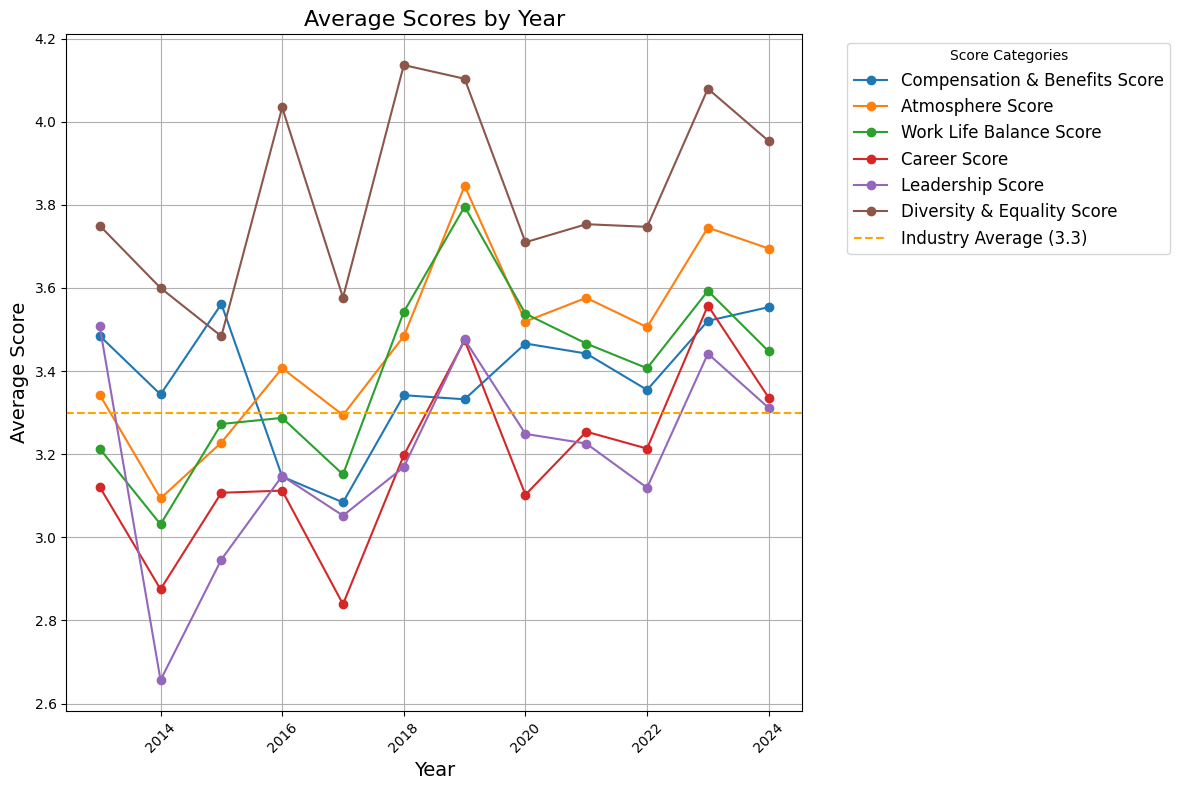

In [5]:
# Assuming your DataFrame has a column named 'year' for grouping
# Step 1: Group by year and calculate the mean for each score category
mean_scores_by_year = df.groupby('year')[[ 
    'Compensation & Benefits Score', 
    'Atmosphere Score',
    'Work Life Balance Score',
    'Career Score',
    'Leadership Score',
    'Diversity & Equality Score',
]].mean().reset_index()

# Step 2: Set the index to 'year' for plotting
mean_scores_by_year.set_index('year', inplace=True)

# Step 3: Plotting the graph
plt.figure(figsize=(12, 8))
mean_scores_by_year.plot(marker='o', figsize=(12, 8))

# Customizing the graph
plt.title('Average Scores by Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Score', fontsize=14)
plt.xticks(rotation=45)
plt.grid()

# Step 4: Add the industry average score (3.3) as a constant horizontal line
plt.axhline(y=3.3, color='orange', linestyle='--', label='Industry Average (3.3)')

# Move the legend outside the graph
plt.legend(title='Score Categories', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)

plt.tight_layout()

# Step 5: Show the graph
plt.show()

In [31]:
score_columns = [
    'Main Score', 
    'Compensation & Benefits Score', 
    'Atmosphere Score', 
    'Work Life Balance Score', 
    'Career Score', 
    'Leadership Score', 
    'Diversity & Equality Score'
]

# Step 1: Calculate the average score for each specified column
average_scores = df[score_columns].mean().reset_index()

# Step 2: Rename the columns for clarity
average_scores.columns = ['Score Category', 'Average Score']

# Step 3: Print the results
print(average_scores)

# Optional: Save the results to a CSV file
average_scores.to_csv('average_scores_columns.csv', index=False)

                  Score Category  Average Score
0                     Main Score       3.685033
1  Compensation & Benefits Score       3.404100
2               Atmosphere Score       3.582394
3        Work Life Balance Score       3.487641
4                   Career Score       3.265526
5               Leadership Score       3.256914
6     Diversity & Equality Score       3.886530


### The end of the notebook